In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Brownian Motion (Standard Wiener Process)

The formal definition of Brownian Motion is
$$dx = 0*dt + dW $$

where W(t) is a standard Wiener process, such that

$$ W(t) - W(s) = \sqrt{t-s} * N(0, 1)$$

where N(0, 1) denotes a normally distributed random variable with zero men and unit variance.

By applying Euler-Maruyama method, the Brownian Motion could be viewed as an iterated sum of independent identical normal random variables. 


First, I simulated several Brownian Motion with specified number of time points. Then, the simulated processes are ploted with different colors.

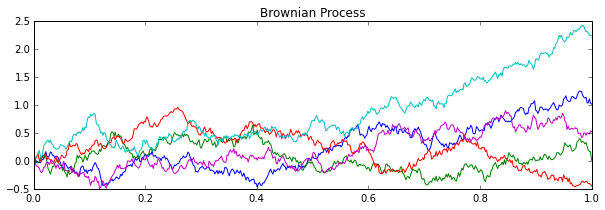

In [2]:
# set parameters
T = 1                     ## the total time simulated
N = 500                   ## the number of time points within time = 0 ~ T
dt = T/N                  ## the length of dt
t = np.linspace(0, T, N)  ## time points
sampleNum = 5            ## number of brownian process simulated

# create iid standard normal random variables multiplied by squared root of dt
dW = dt**0.5 * np.random.multivariate_normal([0] * N, np.identity(N), sampleNum)

# simulate brownian process
W = np.array([ [sum(process[0:idx]) for idx in range(N)] for process in dW ])

# Plot the Brownian Process
fig, ax = plt.subplots(1, 1, figsize=(10,3))
ax.plot(t, W.T)
ax.set_title("Brownian Process")

# Function of the process

In the document writen by Prof. Higham, he evaluated the function of a stochastic process, which has the form as follows:  
$$ u(W(t)) = exp(t + \frac{1}{2} * W(t)) $$
where W(t) is a standard Wiener process. The solution (solid thick line) could be obtained by calculate the means of several simulated process (thin dashed line)

(0, 5)

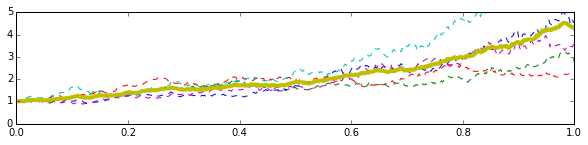

In [3]:
# calculate the function of each simulated process
uW = np.e**(t + 0.5 * W)

# mean of brownian Process
umean = np.mean(uW, axis = 0)

# plot the process and mean
fig, ax = plt.subplots(1, 1, figsize = (10, 2))
ax.plot(t, uW.T,    linestyle = '--')
ax.plot(t, umean.T, linestyle = '-', linewidth = 4)
ax.set_ylim(0, 5)

#  Stochastic Version of a Linear ODE

The Euler-Maryama method is a quick, powerful ideas on simulated a ODE with noise.  
The example ODE here has the form:
$$ dx = f(x)dt + g(x)dW $$

$$ f(x) = λx $$

$$ g(x) = µx $$
The λ and µ are both constants.

In [4]:
# define functions and function that simulated stochastic version of ODE
def f(x, lambdaNum):
    return lambdaNum * x

def g(x, mu):
    return mu * x

def process(x_0 = 0, iterations = 10, sampleNum = 1, dt = 0.01, lambdaNum = 0, mu = 0):
    # initialization
    X = []
    N = iterations
    
    # solve ODE
    for dummyNum in range(sampleNum):
        # initial value of each simulation
        x = [x_0]
        
        # each simulation of stochastic ODE
        for idx in range(N):
            dw = dt**0.5 * float(np.random.standard_normal(1))
            x.append( x[idx] + f(x[idx], lambdaNum) * dt + g(x[idx], mu) * dw)
        
        # add each simulation to a list
        X.append(x)
    
    return np.array(X)

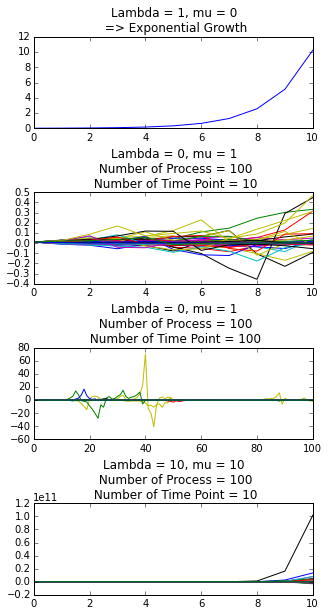

In [17]:
# set parameters
x_0 = 0.01        ## initial value of x
N = 500           ## number of simulated process
dt = 1
iterations = 100

# simulate the solution
## no noise (set mu = 0)
N = 1
iterations = 10
result01 = process(x_0=x_0, sampleNum=N, iterations=iterations, dt=dt, lambdaNum=1, mu=0)

## only noise (set lambda = 0)
N = 100
iterations = 10
result02 = process(x_0=x_0, sampleNum=N, iterations=iterations, dt=dt, lambdaNum=0, mu=1)

## only noise (set lambda = 0)
N = 100
iterations = 100
result03 = process(x_0=x_0, sampleNum=N, iterations=iterations, dt=dt, lambdaNum=0, mu=1)

## Lambda != 0 and mu != 0
N = 100
iterations = 10
result04 = process(x_0=x_0, sampleNum=N, iterations=iterations, dt=dt, lambdaNum=10, mu=10)

# plot the result
fig, ax = plt.subplots(4, 1, figsize = (5, 10))
plt.subplots_adjust(hspace = 0.7)
ax[0].plot(result01.T)
ax[0].set_title("Lambda = 1, mu = 0 \n => Exponential Growth")
ax[1].plot(result02.T)
ax[1].set_title("Lambda = 0, mu = 1 \n Number of Process = 100 \n Number of Time Point = 10")
ax[2].plot(result03.T)
ax[2].set_title("Lambda = 0, mu = 1 \n Number of Process = 100 \n Number of Time Point = 100")
ax[3].plot(result04.T)
ax[3].set_title("Lambda = 10, mu = 10 \n Number of Process = 100 \n Number of Time Point = 10")

In the second picture, where mu = 1 and lambda = 0, the noise in next data point is proportion to the value of the last step. Therefore, the process spread seems to spread in the short iterations. However, when the time point increase, the mean of the process is zero, since the kernel of the noise is a normal random variable with mean equals to zero. Interestingly, there are some simulated processes rise and decrease dramatically, but eventually converge back to zero.

#  Stochastic Version of a Gene Expression ODE

The ODE of the gene expression is
$$ \frac{dx}{dt} = \beta - \alpha*x $$

By adding the noise, the Langevin equation of the gene expression becomes
$$ dx = (\beta - \alpha*x) * dt + \sqrt{\beta*dt} * N(0, 1) + \sqrt{\alpha*x*dt} * N(0, 1)$$

In [6]:
def geneExp1(x_0=0, beta=0, alpha=0, iterations=10, sampleNum = 1, dt = 0.01):
    # initialization
    X = []
    N = iterations
    
    for dummyNum in range(sampleNum):
        # initial value of each simulation
        x = [x_0]
        
        # simulation
        for idx in range(N):
            dx = (beta - alpha * x[idx]) * dt
            x.append( x[idx] + dx )
            
        # add each simulation to a list
        X.append(x)
    
    return np.array(X)    
        
def geneExp2(x_0=0, beta=0, alpha=0, iterations=10, sampleNum = 1, dt = 0.01):
    # initialization
    X = []
    N = iterations
    
    for dummyNum in range(sampleNum):
        # initial value of each simulation
        x = [x_0]
        
        # simulation
        for idx in range(N):
            dx = (beta - alpha * x[idx]) * dt 
            dx += (beta * dt)**0.5 * float(np.random.standard_normal(1))
            dx += (alpha * x[idx] * dt)**0.5 * float(np.random.standard_normal(1))
            x.append( x[idx] + dx )
            
        # add each simulation to a list
        X.append(x)
    
    return np.array(X)

By setting the initial value smaller than the ratio BETA/ALPHA, we could observe how the gene expression level rise to the steady state. On the other hand, when the inital value is set larger than the ratio BETA/ALPHA, we could observe how the protein level decay to the steady state.

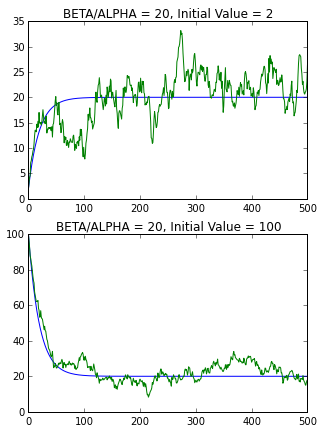

In [7]:
# set parameters
BETA = 100
ALPHA = 5
dt = 0.01
iterations = 500
sampleNum = 1

# simulation gene expression
x_0 = 2
resGeneExp01 = geneExp1(x_0=x_0, beta=BETA, alpha=ALPHA, iterations=iterations, sampleNum=1, dt=dt)
resGeneExp02 = geneExp2(x_0=x_0, beta=BETA, alpha=ALPHA, iterations=iterations, sampleNum=sampleNum, dt=dt)

x_0 = 100
resGeneExp11 = geneExp1(x_0=x_0, beta=BETA, alpha=ALPHA, iterations=iterations, sampleNum=1, dt=dt)
resGeneExp12 = geneExp2(x_0=x_0, beta=BETA, alpha=ALPHA, iterations=iterations, sampleNum=sampleNum, dt=dt)

# plot the simulation
fig, ax = plt.subplots(2, 1, figsize=(5, 7))
ax[0].plot(resGeneExp01.T)
ax[0].plot(resGeneExp02.T)
ax[0].set_title("BETA/ALPHA = 20, Initial Value = 2")
ax[1].plot(resGeneExp11.T)
ax[1].plot(resGeneExp12.T)
ax[1].set_title("BETA/ALPHA = 20, Initial Value = 100")

Note that in the plot above, the blue line represents the deterministic ODE of gene expression, and the green line is the stochastic version of the gene expression.